<a href="https://colab.research.google.com/github/semesarker/A-Dilated-Attention-U-Net-Based-Approach-on-Speech-Emotion-Recognition/blob/main/Dilated_Attention_Unet_model_on_Augmented_RAVDESS_using_feature_concatenation(mfcc%26mel_spectrogram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/THSIS/rav_tess_dataset/new/RAV.zip'

Archive:  /content/drive/MyDrive/THSIS/rav_tess_dataset/new/RAV.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-02-0

In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = "/content/rav"
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_14',
 'Actor_18',
 'Actor_08',
 'Actor_20',
 'Actor_04',
 'Actor_09',
 'Actor_11',
 'Actor_03',
 'Actor_16',
 'Actor_15',
 'Actor_23',
 'Actor_22',
 'Actor_10',
 'Actor_07',
 'Actor_12',
 'Actor_05',
 'Actor_06',
 'Actor_02',
 'Actor_24',
 'Actor_01',
 'Actor_13',
 'Actor_21',
 'Actor_17',
 'Actor_19']

In [ ]:
a=list()
b=list()
c=list()
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part1 = file.split('.')[0]
        part2 = part1.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part2[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

        a.append(Ravdess +'/'+ directory +'/'+file)
        b.append(part1)
        c.append(part2)

In [ ]:
file_path

['/content/rav/Actor_14/03-01-04-01-02-02-14.wav',
 '/content/rav/Actor_14/03-01-07-01-02-01-14.wav',
 '/content/rav/Actor_14/03-01-05-01-02-01-14.wav',
 '/content/rav/Actor_14/03-01-04-02-01-01-14.wav',
 '/content/rav/Actor_14/03-01-07-02-02-02-14.wav',
 '/content/rav/Actor_14/03-01-08-01-02-02-14.wav',
 '/content/rav/Actor_14/03-01-04-01-01-02-14.wav',
 '/content/rav/Actor_14/03-01-06-02-01-02-14.wav',
 '/content/rav/Actor_14/03-01-06-01-02-02-14.wav',
 '/content/rav/Actor_14/03-01-05-02-02-02-14.wav',
 '/content/rav/Actor_14/03-01-02-01-02-01-14.wav',
 '/content/rav/Actor_14/03-01-05-02-02-01-14.wav',
 '/content/rav/Actor_14/03-01-03-01-02-02-14.wav',
 '/content/rav/Actor_14/03-01-02-01-01-02-14.wav',
 '/content/rav/Actor_14/03-01-04-02-01-02-14.wav',
 '/content/rav/Actor_14/03-01-01-01-01-02-14.wav',
 '/content/rav/Actor_14/03-01-06-01-02-01-14.wav',
 '/content/rav/Actor_14/03-01-08-02-01-02-14.wav',
 '/content/rav/Actor_14/03-01-07-02-02-01-14.wav',
 '/content/rav/Actor_14/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,sad,/content/rav/Actor_14/03-01-04-01-02-02-14.wav
1,disgust,/content/rav/Actor_14/03-01-07-01-02-01-14.wav
2,angry,/content/rav/Actor_14/03-01-05-01-02-01-14.wav
3,sad,/content/rav/Actor_14/03-01-04-02-01-01-14.wav
4,disgust,/content/rav/Actor_14/03-01-07-02-02-02-14.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
Ravdess_df.Emotions.value_counts()

sad         192
disgust     192
angry       192
surprise    192
fear        192
calm        192
happy       192
neutral      96
Name: Emotions, dtype: int64

In [ ]:
def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.05*np.random.uniform()*np.amax(data)   # more noise reduce the value to 0.5
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

In [ ]:
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*1000)  #default at 500
    return np.roll(data, s_range)

In [ ]:
def stretch(data, rate=0.8):
    """
    Streching the Sound. Note that this expands the dataset slightly
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

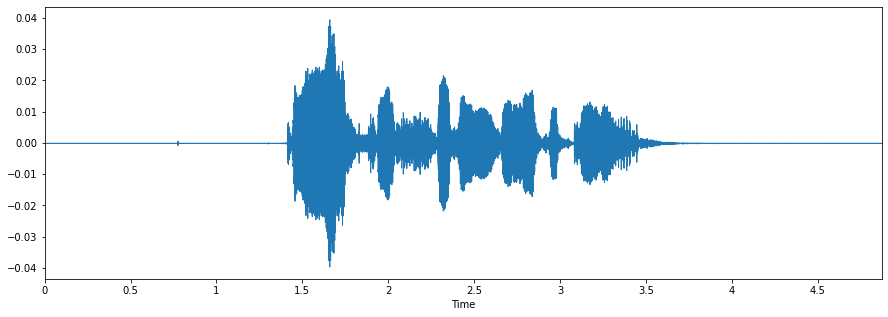

In [ ]:
# Use one audio file in previous parts again
fname = file_path[200]
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=16000)

# Paly it again to refresh our memory
IPython.display.Audio(data, rate=16000)

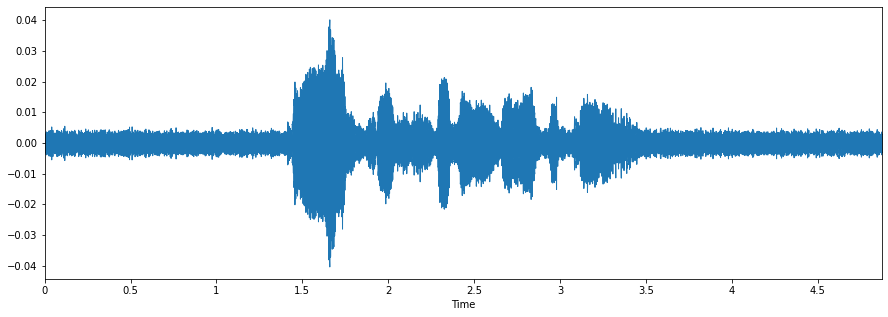

In [ ]:
x = noise(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=16000)
IPython.display.Audio(x, rate=16000)

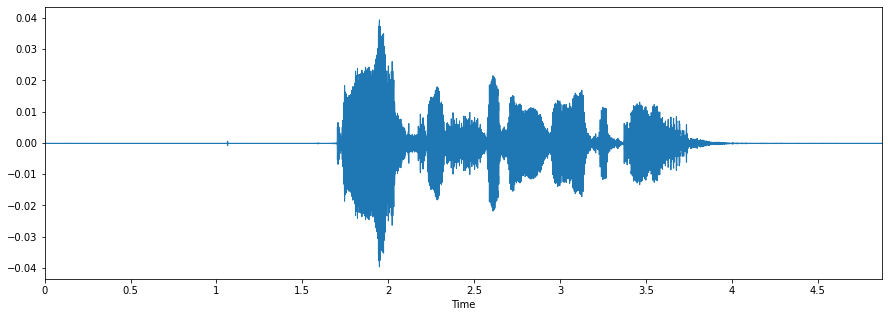

In [ ]:
x = shift(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=16000)
IPython.display.Audio(x, rate=16000)

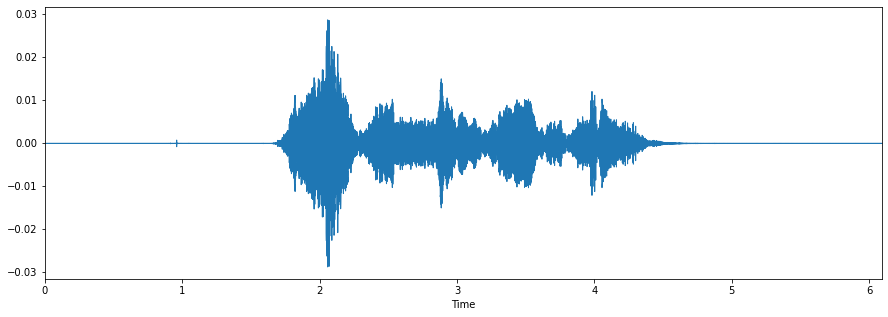

In [ ]:
x = stretch(data)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=16000)
IPython.display.Audio(x, rate=16000)

In [ ]:
import sklearn
import scipy.signal as ss
import librosa as lr
import librosa.display
import numpy as np
import math
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile as sf

In [ ]:
Num_audio_sample_test=1440
Fs = 16000

In [ ]:
sr=16000
Out_path_test='/content/drive/MyDrive/THSIS/Test_New/output/'
# Out_path_noisy='/content/drive/MyDrive/THSIS/ravii/test/Noisy/'
for index in range(Num_audio_sample_test):
  clean, Fs = lr.load(a[index], sr = Fs)
  Out_file_clean = b[index] + "_Clean_" + str(index)
  # print(Out_path_test  + Out_file_clean +".wav")
  # print(Out_file_clean)
  sf.write(Out_path_test  + Out_file_clean +".wav", clean,sr)
  # for Noise_file in Noise_type:

  noisy = noise(clean)
  Out_file_noisy = b[index]+ "_Noisy_" + str(index)
  sf.write(Out_path_test + Out_file_noisy + ".wav", noisy, sr)

  shifty = shift(clean)
  Out_file_noisy = b[index]+ "_shift_" + str(index)
  sf.write(Out_path_test + Out_file_noisy + ".wav", shifty, sr)

  stretchy= stretch(clean, rate=0.8)
  Out_file_noisy = b[index]+ "_stretchy_" + str(index)
  sf.write(Out_path_test + Out_file_noisy + ".wav", stretchy, sr)




In [ ]:
Ravdess_final = '/content/drive/MyDrive/THSIS/Test_New/output/'
Ravdess_final_directory_list = os.listdir(Ravdess_final)
Ravdess_final_directory_list

['03-01-04-01-02-02-14_Clean_0.wav',
 '03-01-04-01-02-02-14_Noisy_0.wav',
 '03-01-04-01-02-02-14_shift_0.wav',
 '03-01-04-01-02-02-14_stretchy_0.wav',
 '03-01-07-01-02-01-14_Clean_1.wav',
 '03-01-07-01-02-01-14_Noisy_1.wav',
 '03-01-07-01-02-01-14_shift_1.wav',
 '03-01-07-01-02-01-14_stretchy_1.wav',
 '03-01-05-01-02-01-14_Clean_2.wav',
 '03-01-05-01-02-01-14_Noisy_2.wav',
 '03-01-05-01-02-01-14_shift_2.wav',
 '03-01-05-01-02-01-14_stretchy_2.wav',
 '03-01-04-02-01-01-14_Clean_3.wav',
 '03-01-04-02-01-01-14_Noisy_3.wav',
 '03-01-04-02-01-01-14_shift_3.wav',
 '03-01-04-02-01-01-14_stretchy_3.wav',
 '03-01-07-02-02-02-14_Clean_4.wav',
 '03-01-07-02-02-02-14_Noisy_4.wav',
 '03-01-07-02-02-02-14_shift_4.wav',
 '03-01-07-02-02-02-14_stretchy_4.wav',
 '03-01-08-01-02-02-14_Clean_5.wav',
 '03-01-08-01-02-02-14_Noisy_5.wav',
 '03-01-08-01-02-02-14_shift_5.wav',
 '03-01-08-01-02-02-14_stretchy_5.wav',
 '03-01-04-01-01-02-14_Clean_6.wav',
 '03-01-04-01-01-02-14_Noisy_6.wav',
 '03-01-04-01-01-02-

In [ ]:
a=list()
b=list()
c=list()
# Ravdess preprocess
Ravdess_final_directory_list = os.listdir(Ravdess_final)
file_path = []
file_emotion = []
for directory in Ravdess_final_directory_list:

        part1 = directory.split('_')[0]
        # print(part1)
        part2 = part1.split('-')
        # print(part2)
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part2[2]))
        file_path.append(Ravdess_final +  directory )

        a.append(Ravdess_final + directory )
        b.append(part1)
        c.append(part2)

In [ ]:
b[10]

'03-01-05-01-02-01-14'

In [ ]:
b[0]

'03-01-04-01-02-02-14'

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_final_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions

Ravdess_final_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_final_df

,Emotions,Path
0,sad,/content/drive/MyDrive/THSIS/Test_New/output/0...
1,sad,/content/drive/MyDrive/THSIS/Test_New/output/0...
2,sad,/content/drive/MyDrive/THSIS/Test_New/output/0...
3,sad,/content/drive/MyDrive/THSIS/Test_New/output/0...
4,disgust,/content/drive/MyDrive/THSIS/Test_New/output/0...
...,...,...
5755,angry,/content/drive/MyDrive/THSIS/Test_New/output/0...
5756,calm,/content/drive/MyDrive/THSIS/Test_New/output/0...
5757,calm,/content/drive/MyDrive/THSIS/Test_New/output/0...
5758,calm,/content/drive/MyDrive/THSIS/Test_New/output/0...


In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=3
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,94,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate

                               ,duration=3

                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,48000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_fft=2048,hop_length=512)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate,n_fft=2048,hop_length=512, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=0)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_mfcc = prepare_data(Ravdess_final_df,n=60,mfcc=1,mel=1)

  0%|          | 5/5760 [00:00<04:02, 23.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 11/5760 [00:00<03:55, 24.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 14/5760 [00:00<03:56, 24.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 22/5760 [00:00<03:06, 30.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 34/5760 [00:01<02:18, 41.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 45/5760 [00:01<02:07, 44.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 56/5760 [00:01<02:00, 47.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 66/5760 [00:01<02:04, 45.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 77/5760 [00:01<01:57, 48.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 87/5760 [00:02<02:05, 45.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 97/5760 [00:02<02:03, 45.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 107/5760 [00:02<02:05, 45.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 118/5760 [00:02<01:57, 47.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 130/5760 [00:03<01:53, 49.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 135/5760 [00:03<01:58, 47.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 147/5760 [00:03<01:53, 49.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 158/5760 [00:03<01:51, 50.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 170/5760 [00:03<01:49, 51.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 182/5760 [00:04<01:49, 50.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 193/5760 [00:04<01:54, 48.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 204/5760 [00:04<01:54, 48.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

  4%|▎         | 215/5760 [00:04<01:52, 49.27it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 225/5760 [00:05<01:54, 48.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 230/5760 [00:05<01:55, 47.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 240/5760 [00:05<02:04, 44.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 250/5760 [00:05<02:23, 38.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 261/5760 [00:05<02:11, 41.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 272/5760 [00:06<01:58, 46.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 278/5760 [00:06<01:55, 47.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 288/5760 [00:06<01:59, 45.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 298/5760 [00:06<02:01, 44.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 309/5760 [00:06<01:56, 46.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 320/5760 [00:07<01:55, 47.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 330/5760 [00:07<02:00, 44.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 340/5760 [00:07<01:57, 46.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 352/5760 [00:07<01:48, 50.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 358/5760 [00:07<01:46, 50.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 370/5760 [00:08<01:46, 50.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 381/5760 [00:08<01:52, 47.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 393/5760 [00:08<01:46, 50.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 405/5760 [00:08<01:45, 50.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 411/5760 [00:09<01:54, 46.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 422/5760 [00:09<01:49, 48.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 432/5760 [00:09<01:54, 46.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 443/5760 [00:09<01:50, 48.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 453/5760 [00:09<01:49, 48.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

  8%|▊         | 464/5760 [00:10<01:48, 48.79it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 474/5760 [00:10<01:48, 48.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 484/5760 [00:10<01:59, 44.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 494/5760 [00:10<01:54, 45.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 504/5760 [00:11<01:55, 45.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 509/5760 [00:11<01:58, 44.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 520/5760 [00:11<01:54, 45.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 530/5760 [00:11<01:54, 45.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 540/5760 [00:11<01:56, 44.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 550/5760 [00:12<01:57, 44.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 560/5760 [00:12<01:52, 46.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 10%|▉         | 570/5760 [00:12<01:50, 46.93it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 580/5760 [00:12<01:54, 45.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 590/5760 [00:12<01:52, 46.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 600/5760 [00:13<01:50, 46.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 610/5760 [00:13<01:51, 46.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 620/5760 [00:13<01:52, 45.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 630/5760 [00:13<01:50, 46.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 640/5760 [00:13<01:50, 46.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 650/5760 [00:14<01:52, 45.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 655/5760 [00:14<02:05, 40.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 664/5760 [00:14<02:15, 37.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 668/5760 [00:14<02:35, 32.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 672/5760 [00:14<02:57, 28.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 679/5760 [00:15<03:25, 24.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 686/5760 [00:15<03:01, 27.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 693/5760 [00:15<02:45, 30.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 701/5760 [00:15<02:37, 32.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 705/5760 [00:16<02:52, 29.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 713/5760 [00:16<02:55, 28.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 721/5760 [00:16<02:49, 29.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 725/5760 [00:16<02:49, 29.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 733/5760 [00:17<02:56, 28.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 739/5760 [00:17<03:08, 26.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 745/5760 [00:17<03:10, 26.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 748/5760 [00:17<03:18, 25.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 754/5760 [00:17<03:21, 24.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 764/5760 [00:18<02:21, 35.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 775/5760 [00:18<01:57, 42.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 786/5760 [00:18<01:52, 44.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 797/5760 [00:18<01:51, 44.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 808/5760 [00:19<01:45, 47.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 14%|█▍        | 819/5760 [00:19<01:42, 48.12it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 829/5760 [00:19<01:45, 46.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 834/5760 [00:19<01:54, 43.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 844/5760 [00:19<01:52, 43.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 854/5760 [00:20<01:47, 45.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 865/5760 [00:20<01:42, 47.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 15%|█▌        | 875/5760 [00:20<01:44, 46.93it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 885/5760 [00:20<01:50, 44.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 896/5760 [00:21<01:44, 46.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 906/5760 [00:21<01:43, 46.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 916/5760 [00:21<01:44, 46.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 926/5760 [00:21<01:45, 45.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 936/5760 [00:21<01:49, 43.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 946/5760 [00:22<01:45, 45.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 957/5760 [00:22<01:39, 48.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 967/5760 [00:22<01:40, 47.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 972/5760 [00:22<01:40, 47.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 983/5760 [00:22<01:44, 45.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 994/5760 [00:23<01:40, 47.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1006/5760 [00:23<01:36, 49.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1016/5760 [00:23<01:41, 46.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1027/5760 [00:23<01:38, 48.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1038/5760 [00:24<01:39, 47.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1049/5760 [00:24<01:35, 49.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1060/5760 [00:24<01:35, 49.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1070/5760 [00:24<01:42, 45.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1080/5760 [00:25<01:42, 45.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1090/5760 [00:25<01:40, 46.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1101/5760 [00:25<01:37, 48.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1106/5760 [00:25<01:36, 48.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 19%|█▉        | 1116/5760 [00:25<01:50, 41.93it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1126/5760 [00:26<01:48, 42.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1136/5760 [00:26<01:41, 45.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1147/5760 [00:26<01:35, 48.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1157/5760 [00:26<01:37, 47.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1167/5760 [00:26<01:42, 44.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1177/5760 [00:27<01:42, 44.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1187/5760 [00:27<01:40, 45.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1198/5760 [00:27<01:37, 46.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1208/5760 [00:27<01:36, 46.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1213/5760 [00:27<01:37, 46.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 21%|██▏       | 1224/5760 [00:28<01:38, 46.17it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1234/5760 [00:28<01:37, 46.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1244/5760 [00:28<01:39, 45.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1254/5760 [00:28<01:41, 44.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1264/5760 [00:29<01:41, 44.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1274/5760 [00:29<01:40, 44.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1285/5760 [00:29<01:34, 47.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▎       | 1296/5760 [00:29<01:32, 48.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1306/5760 [00:29<01:36, 45.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1311/5760 [00:30<01:36, 46.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1321/5760 [00:30<01:37, 45.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1331/5760 [00:30<01:35, 46.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1341/5760 [00:30<01:34, 46.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1351/5760 [00:30<01:38, 44.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1361/5760 [00:31<01:38, 44.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1373/5760 [00:31<01:29, 48.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1383/5760 [00:31<01:29, 49.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1393/5760 [00:31<01:35, 45.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1404/5760 [00:32<01:30, 48.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1414/5760 [00:32<01:31, 47.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1426/5760 [00:32<01:27, 49.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1436/5760 [00:32<01:30, 47.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1447/5760 [00:32<01:28, 48.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1457/5760 [00:33<01:28, 48.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1467/5760 [00:33<01:33, 46.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1477/5760 [00:33<01:33, 45.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1487/5760 [00:33<01:35, 44.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1497/5760 [00:34<01:34, 45.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1502/5760 [00:34<01:34, 44.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1512/5760 [00:34<01:35, 44.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1522/5760 [00:34<01:32, 45.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1532/5760 [00:34<01:33, 45.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1543/5760 [00:35<01:28, 47.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1553/5760 [00:35<01:27, 48.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1564/5760 [00:35<01:27, 48.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1574/5760 [00:35<01:28, 47.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1584/5760 [00:35<01:32, 45.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1594/5760 [00:36<01:29, 46.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1604/5760 [00:36<01:34, 43.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1614/5760 [00:36<01:33, 44.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1619/5760 [00:36<01:35, 43.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1629/5760 [00:36<01:34, 43.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1639/5760 [00:37<01:30, 45.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 1649/5760 [00:37<01:30, 45.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1660/5760 [00:37<01:27, 47.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1670/5760 [00:37<01:29, 45.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1680/5760 [00:38<01:26, 47.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1691/5760 [00:38<01:25, 47.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 30%|██▉       | 1701/5760 [00:38<01:28, 46.06it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 1711/5760 [00:38<01:29, 45.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 1721/5760 [00:38<01:26, 46.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 1731/5760 [00:39<01:26, 46.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 1742/5760 [00:39<01:22, 48.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 1752/5760 [00:39<01:25, 46.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1762/5760 [00:39<01:27, 45.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1772/5760 [00:40<01:25, 46.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1782/5760 [00:40<01:24, 47.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1792/5760 [00:40<01:28, 44.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 1802/5760 [00:40<01:27, 45.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 1812/5760 [00:40<01:29, 43.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1822/5760 [00:41<01:28, 44.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1832/5760 [00:41<01:26, 45.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1837/5760 [00:41<01:26, 45.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 32%|███▏      | 1847/5760 [00:41<01:26, 45.31it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1857/5760 [00:41<01:27, 44.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1867/5760 [00:42<01:26, 45.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1878/5760 [00:42<01:21, 47.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1888/5760 [00:42<01:24, 46.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1898/5760 [00:42<01:26, 44.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1908/5760 [00:43<01:26, 44.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 33%|███▎      | 1913/5760 [00:43<01:27, 44.16it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1929/5760 [00:43<01:21, 46.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 1934/5760 [00:43<01:29, 42.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1944/5760 [00:43<01:29, 42.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1954/5760 [00:44<01:25, 44.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1964/5760 [00:44<01:22, 46.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1974/5760 [00:44<01:23, 45.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1984/5760 [00:44<01:26, 43.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 1994/5760 [00:45<01:23, 44.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2004/5760 [00:45<01:22, 45.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2014/5760 [00:45<01:24, 44.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2024/5760 [00:45<01:22, 45.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2034/5760 [00:45<01:24, 44.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2044/5760 [00:46<01:21, 45.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2054/5760 [00:46<01:18, 46.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2064/5760 [00:46<01:18, 47.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2069/5760 [00:46<01:22, 44.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2079/5760 [00:46<01:23, 43.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2089/5760 [00:47<01:30, 40.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2094/5760 [00:47<02:01, 30.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2098/5760 [00:47<02:26, 24.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2106/5760 [00:47<02:02, 29.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2116/5760 [00:48<01:38, 36.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2121/5760 [00:48<01:47, 33.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2125/5760 [00:48<02:21, 25.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2133/5760 [00:48<02:19, 26.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2143/5760 [00:49<01:43, 34.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2153/5760 [00:49<01:36, 37.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2157/5760 [00:49<02:17, 26.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2161/5760 [00:49<02:24, 24.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2170/5760 [00:50<01:56, 30.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2181/5760 [00:50<01:32, 38.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2191/5760 [00:50<01:24, 42.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2201/5760 [00:50<01:20, 44.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2211/5760 [00:50<01:27, 40.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2221/5760 [00:51<01:22, 42.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2231/5760 [00:51<01:17, 45.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2241/5760 [00:51<01:15, 46.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2251/5760 [00:51<01:16, 45.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2256/5760 [00:51<01:22, 42.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2266/5760 [00:52<01:18, 44.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2276/5760 [00:52<01:16, 45.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2286/5760 [00:52<01:16, 45.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2296/5760 [00:52<01:14, 46.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 40%|████      | 2306/5760 [00:53<01:16, 45.03it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2316/5760 [00:53<01:14, 46.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2327/5760 [00:53<01:13, 46.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2337/5760 [00:53<01:14, 45.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 41%|████      | 2347/5760 [00:53<01:19, 42.90it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2357/5760 [00:54<01:15, 45.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2367/5760 [00:54<01:14, 45.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2377/5760 [00:54<01:13, 46.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2387/5760 [00:54<01:12, 46.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2397/5760 [00:55<01:15, 44.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2408/5760 [00:55<01:12, 46.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2418/5760 [00:55<01:11, 46.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2428/5760 [00:55<01:11, 46.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2438/5760 [00:55<01:14, 44.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▎     | 2448/5760 [00:56<01:14, 44.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2458/5760 [00:56<01:11, 45.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2469/5760 [00:56<01:09, 47.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2475/5760 [00:56<01:07, 48.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2486/5760 [00:56<01:11, 45.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2496/5760 [00:57<01:12, 44.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 2506/5760 [00:57<01:11, 45.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 2516/5760 [00:57<01:09, 46.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2526/5760 [00:57<01:11, 44.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2536/5760 [00:58<01:16, 42.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2547/5760 [00:58<01:10, 45.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2558/5760 [00:58<01:06, 48.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 2568/5760 [00:58<01:07, 47.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 2578/5760 [00:59<01:08, 46.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 2583/5760 [00:59<01:10, 45.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 2594/5760 [00:59<01:09, 45.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 2604/5760 [00:59<01:08, 46.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 2614/5760 [00:59<01:09, 45.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2624/5760 [01:00<01:08, 45.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2634/5760 [01:00<01:12, 43.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2644/5760 [01:00<01:09, 44.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2654/5760 [01:00<01:06, 46.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 2664/5760 [01:00<01:05, 47.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 2674/5760 [01:01<01:06, 46.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2685/5760 [01:01<01:06, 46.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2695/5760 [01:01<01:05, 46.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2705/5760 [01:01<01:10, 43.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2715/5760 [01:02<01:09, 43.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2720/5760 [01:02<01:10, 43.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2730/5760 [01:02<01:09, 43.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2741/5760 [01:02<01:06, 45.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2751/5760 [01:02<01:07, 44.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2761/5760 [01:03<01:06, 45.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2771/5760 [01:03<01:06, 44.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2781/5760 [01:03<01:06, 44.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2791/5760 [01:03<01:11, 41.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 49%|████▊     | 2801/5760 [01:04<01:07, 43.80it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2811/5760 [01:04<01:06, 44.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2821/5760 [01:04<01:03, 46.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2831/5760 [01:04<01:04, 45.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2841/5760 [01:04<01:03, 46.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2851/5760 [01:05<01:01, 47.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 2856/5760 [01:05<01:03, 46.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 2867/5760 [01:05<01:05, 44.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 2877/5760 [01:05<01:03, 45.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2887/5760 [01:05<01:03, 45.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2897/5760 [01:06<01:03, 44.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2907/5760 [01:06<01:01, 46.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2918/5760 [01:06<01:02, 45.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2929/5760 [01:06<01:01, 46.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2939/5760 [01:07<01:00, 46.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2944/5760 [01:07<01:00, 46.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 2955/5760 [01:07<00:59, 47.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 2965/5760 [01:07<01:03, 44.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 2975/5760 [01:07<01:02, 44.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 2985/5760 [01:08<01:03, 43.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 2995/5760 [01:08<01:02, 44.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3005/5760 [01:08<01:01, 44.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3015/5760 [01:08<01:02, 44.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3025/5760 [01:09<01:03, 42.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3035/5760 [01:09<01:02, 43.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3045/5760 [01:09<00:59, 45.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3055/5760 [01:09<00:58, 45.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3065/5760 [01:09<00:59, 45.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3075/5760 [01:10<00:57, 46.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3085/5760 [01:10<01:00, 44.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3090/5760 [01:10<01:02, 42.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3100/5760 [01:10<01:00, 43.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3110/5760 [01:10<00:59, 44.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3120/5760 [01:11<00:59, 44.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3130/5760 [01:11<01:00, 43.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3140/5760 [01:11<01:03, 41.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3150/5760 [01:11<00:59, 44.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3160/5760 [01:12<00:58, 44.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3170/5760 [01:12<00:59, 43.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3175/5760 [01:12<01:01, 42.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3185/5760 [01:12<01:05, 39.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3194/5760 [01:12<01:00, 42.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3204/5760 [01:13<01:00, 41.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3214/5760 [01:13<01:00, 42.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3224/5760 [01:13<00:58, 43.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3229/5760 [01:13<01:00, 41.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3239/5760 [01:13<01:00, 41.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3249/5760 [01:14<00:57, 43.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 57%|█████▋    | 3259/5760 [01:14<00:56, 44.07it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3270/5760 [01:14<00:53, 46.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3281/5760 [01:14<00:53, 46.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3291/5760 [01:15<00:54, 45.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3301/5760 [01:15<00:54, 44.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3311/5760 [01:15<00:55, 44.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3316/5760 [01:15<00:58, 41.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3326/5760 [01:15<00:59, 40.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3336/5760 [01:16<01:00, 40.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3346/5760 [01:16<00:56, 42.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3356/5760 [01:16<00:54, 43.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3366/5760 [01:16<00:57, 41.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 3376/5760 [01:17<00:55, 42.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3386/5760 [01:17<00:52, 44.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3391/5760 [01:17<00:52, 44.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3401/5760 [01:17<00:52, 44.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3411/5760 [01:17<00:53, 44.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3421/5760 [01:18<00:50, 46.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 3432/5760 [01:18<00:49, 47.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 3442/5760 [01:18<00:51, 45.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 3452/5760 [01:18<00:51, 45.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 3462/5760 [01:19<00:52, 44.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 3472/5760 [01:19<00:51, 44.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 3482/5760 [01:19<00:51, 44.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 3492/5760 [01:19<00:51, 44.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 61%|██████    | 3497/5760 [01:19<00:56, 39.82it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 3507/5760 [01:20<00:52, 43.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 3517/5760 [01:20<00:52, 42.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 61%|██████    | 3527/5760 [01:20<00:49, 44.83it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 3537/5760 [01:20<00:47, 46.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3547/5760 [01:20<00:48, 45.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3557/5760 [01:21<00:49, 44.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3567/5760 [01:21<00:48, 44.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3577/5760 [01:21<00:47, 45.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3582/5760 [01:21<00:49, 43.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3592/5760 [01:22<00:51, 41.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3602/5760 [01:22<00:50, 43.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3612/5760 [01:22<00:47, 44.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3622/5760 [01:22<00:46, 46.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3632/5760 [01:22<00:46, 45.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3642/5760 [01:23<00:48, 43.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3653/5760 [01:23<00:46, 45.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 3664/5760 [01:23<00:44, 47.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 3669/5760 [01:23<00:46, 45.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3679/5760 [01:23<00:46, 44.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3690/5760 [01:24<00:45, 45.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3700/5760 [01:24<00:45, 45.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3710/5760 [01:24<00:46, 43.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 3720/5760 [01:24<00:45, 44.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 3730/5760 [01:25<00:46, 43.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 3740/5760 [01:25<00:44, 44.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 3745/5760 [01:25<00:45, 44.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 3755/5760 [01:25<00:45, 43.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 3765/5760 [01:25<00:44, 44.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3775/5760 [01:26<00:46, 42.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3785/5760 [01:26<00:44, 44.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3795/5760 [01:26<00:44, 43.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3805/5760 [01:26<00:44, 44.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3815/5760 [01:27<00:42, 45.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 3825/5760 [01:27<00:44, 43.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3835/5760 [01:27<00:44, 43.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3845/5760 [01:27<00:44, 42.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3850/5760 [01:27<00:44, 43.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3861/5760 [01:28<00:41, 46.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3871/5760 [01:28<00:42, 44.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3881/5760 [01:28<00:42, 44.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3891/5760 [01:28<00:46, 40.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3901/5760 [01:29<00:44, 42.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3906/5760 [01:29<00:45, 41.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3916/5760 [01:29<00:42, 43.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3926/5760 [01:29<00:41, 43.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3936/5760 [01:29<00:41, 43.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 3946/5760 [01:30<00:42, 42.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 3956/5760 [01:30<00:42, 42.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 3966/5760 [01:30<00:42, 41.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 3976/5760 [01:30<00:43, 41.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 3986/5760 [01:31<00:40, 44.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 3996/5760 [01:31<00:40, 43.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4007/5760 [01:31<00:39, 44.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4017/5760 [01:31<00:37, 46.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4027/5760 [01:31<00:38, 45.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4032/5760 [01:32<00:38, 45.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4042/5760 [01:32<00:39, 43.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4052/5760 [01:32<00:38, 44.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4062/5760 [01:32<00:37, 45.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4072/5760 [01:33<00:36, 45.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4082/5760 [01:33<00:37, 45.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4092/5760 [01:33<00:39, 42.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4102/5760 [01:33<00:37, 44.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4112/5760 [01:33<00:38, 43.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4122/5760 [01:34<00:37, 43.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4127/5760 [01:34<00:37, 43.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4137/5760 [01:34<00:37, 42.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4147/5760 [01:34<00:36, 44.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4157/5760 [01:34<00:37, 43.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4167/5760 [01:35<00:35, 44.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4177/5760 [01:35<00:37, 42.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4187/5760 [01:35<00:36, 43.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4197/5760 [01:35<00:34, 44.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4207/5760 [01:36<00:33, 45.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4217/5760 [01:36<00:33, 45.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4227/5760 [01:36<00:35, 42.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 4237/5760 [01:36<00:34, 44.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 4247/5760 [01:36<00:32, 46.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4257/5760 [01:37<00:32, 46.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4267/5760 [01:37<00:32, 45.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4277/5760 [01:37<00:33, 44.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4287/5760 [01:37<00:32, 45.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4297/5760 [01:38<00:33, 44.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4307/5760 [01:38<00:32, 45.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4312/5760 [01:38<00:33, 43.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4322/5760 [01:38<00:34, 42.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4332/5760 [01:38<00:33, 42.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4342/5760 [01:39<00:32, 44.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4353/5760 [01:39<00:30, 45.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4363/5760 [01:39<00:32, 43.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4368/5760 [01:39<00:33, 41.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4378/5760 [01:40<00:32, 42.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4389/5760 [01:40<00:30, 45.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 4399/5760 [01:40<00:30, 44.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4409/5760 [01:40<00:32, 41.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4419/5760 [01:40<00:31, 42.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4429/5760 [01:41<00:31, 42.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4439/5760 [01:41<00:30, 43.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4444/5760 [01:41<00:31, 41.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4454/5760 [01:41<00:31, 41.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4465/5760 [01:42<00:28, 45.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4475/5760 [01:42<00:28, 44.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4485/5760 [01:42<00:29, 43.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4495/5760 [01:42<00:30, 41.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4505/5760 [01:42<00:28, 44.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4515/5760 [01:43<00:27, 44.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 4525/5760 [01:43<00:27, 45.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 4535/5760 [01:43<00:27, 44.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4540/5760 [01:43<00:28, 43.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4550/5760 [01:43<00:27, 43.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4560/5760 [01:44<00:27, 44.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4570/5760 [01:44<00:25, 45.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 4580/5760 [01:44<00:25, 45.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 4590/5760 [01:44<00:27, 43.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 4600/5760 [01:45<00:25, 45.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 4610/5760 [01:45<00:25, 45.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 4620/5760 [01:45<00:24, 46.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 4630/5760 [01:45<00:24, 45.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4640/5760 [01:45<00:26, 43.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4650/5760 [01:46<00:25, 43.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4660/5760 [01:46<00:24, 45.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4670/5760 [01:46<00:24, 44.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4675/5760 [01:46<00:25, 43.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 4685/5760 [01:47<00:26, 40.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4695/5760 [01:47<00:25, 42.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4705/5760 [01:47<00:24, 43.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4715/5760 [01:47<00:24, 43.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4725/5760 [01:47<00:24, 41.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4735/5760 [01:48<00:23, 44.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4745/5760 [01:48<00:22, 44.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4750/5760 [01:48<00:23, 42.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4760/5760 [01:48<00:24, 41.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 83%|████████▎ | 4770/5760 [01:49<00:24, 40.16it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4779/5760 [01:49<00:24, 39.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4788/5760 [01:49<00:23, 40.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4793/5760 [01:49<00:24, 40.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4803/5760 [01:49<00:23, 41.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 4813/5760 [01:50<00:22, 42.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 84%|████████▎ | 4823/5760 [01:50<00:21, 44.35it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 84%|████████▍ | 4828/5760 [01:50<00:21, 42.86it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 4838/5760 [01:50<00:22, 40.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 4848/5760 [01:50<00:21, 42.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 4858/5760 [01:51<00:22, 40.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4868/5760 [01:51<00:20, 42.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4878/5760 [01:51<00:20, 42.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4888/5760 [01:51<00:20, 42.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4893/5760 [01:52<00:21, 40.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 4903/5760 [01:52<00:21, 39.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 4913/5760 [01:52<00:20, 40.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 4923/5760 [01:52<00:19, 41.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 4933/5760 [01:53<00:19, 43.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 4943/5760 [01:53<00:18, 43.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 4953/5760 [01:53<00:18, 44.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 4958/5760 [01:53<00:18, 42.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 4968/5760 [01:53<00:17, 44.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 4978/5760 [01:54<00:17, 44.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 4988/5760 [01:54<00:18, 42.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 4998/5760 [01:54<00:16, 45.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5008/5760 [01:54<00:16, 45.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5018/5760 [01:54<00:17, 43.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5028/5760 [01:55<00:17, 42.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5038/5760 [01:55<00:16, 44.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5048/5760 [01:55<00:16, 43.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5058/5760 [01:55<00:16, 43.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 88%|████████▊ | 5069/5760 [01:56<00:14, 46.47it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5074/5760 [01:56<00:15, 43.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 88%|████████▊ | 5084/5760 [01:56<00:15, 43.89it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5094/5760 [01:56<00:14, 44.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 89%|████████▊ | 5104/5760 [01:56<00:14, 44.03it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5114/5760 [01:57<00:14, 43.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5124/5760 [01:57<00:14, 44.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5134/5760 [01:57<00:13, 46.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5144/5760 [01:57<00:13, 45.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5149/5760 [01:57<00:13, 44.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 5160/5760 [01:58<00:13, 45.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 5170/5760 [01:58<00:13, 43.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 5180/5760 [01:58<00:13, 43.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 5190/5760 [01:58<00:12, 44.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 5195/5760 [01:58<00:12, 43.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 5205/5760 [01:59<00:12, 42.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 91%|█████████ | 5215/5760 [01:59<00:12, 42.81it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5225/5760 [01:59<00:12, 41.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5235/5760 [01:59<00:12, 42.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5245/5760 [02:00<00:11, 44.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5255/5760 [02:00<00:11, 44.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 5265/5760 [02:00<00:10, 45.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5275/5760 [02:00<00:10, 46.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5285/5760 [02:01<00:10, 43.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5295/5760 [02:01<00:11, 41.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5305/5760 [02:01<00:10, 42.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5315/5760 [02:01<00:10, 42.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5325/5760 [02:02<00:09, 43.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5335/5760 [02:02<00:09, 45.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5345/5760 [02:02<00:09, 45.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5355/5760 [02:02<00:09, 44.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5360/5760 [02:02<00:09, 41.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5370/5760 [02:03<00:09, 42.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5380/5760 [02:03<00:08, 44.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 5390/5760 [02:03<00:08, 42.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5400/5760 [02:03<00:08, 44.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5410/5760 [02:03<00:08, 41.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 94%|█████████▍| 5420/5760 [02:04<00:08, 42.14it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5430/5760 [02:04<00:07, 43.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5435/5760 [02:04<00:07, 40.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 5445/5760 [02:04<00:07, 40.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 5455/5760 [02:05<00:07, 40.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 5465/5760 [02:05<00:07, 41.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 5470/5760 [02:05<00:06, 41.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 5480/5760 [02:05<00:06, 40.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 5490/5760 [02:05<00:06, 42.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 5500/5760 [02:06<00:06, 42.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5510/5760 [02:06<00:05, 42.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5520/5760 [02:06<00:05, 44.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5525/5760 [02:06<00:05, 41.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5535/5760 [02:06<00:05, 40.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 5545/5760 [02:07<00:05, 42.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 5555/5760 [02:07<00:04, 41.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5565/5760 [02:07<00:04, 42.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5575/5760 [02:07<00:04, 40.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5580/5760 [02:08<00:04, 39.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 97%|█████████▋| 5591/5760 [02:08<00:03, 42.95it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5601/5760 [02:08<00:03, 43.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5611/5760 [02:08<00:03, 42.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5621/5760 [02:09<00:03, 43.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5631/5760 [02:09<00:02, 45.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5641/5760 [02:09<00:02, 45.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5646/5760 [02:09<00:02, 42.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5656/5760 [02:09<00:02, 42.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 98%|█████████▊| 5666/5760 [02:10<00:02, 40.62it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 5676/5760 [02:10<00:02, 41.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 5681/5760 [02:10<00:01, 42.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5691/5760 [02:10<00:01, 43.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5701/5760 [02:10<00:01, 43.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5711/5760 [02:11<00:01, 44.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5721/5760 [02:11<00:00, 45.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5731/5760 [02:11<00:00, 43.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 5741/5760 [02:11<00:00, 41.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 5751/5760 [02:12<00:00, 42.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|██████████| 5760/5760 [02:12<00:00, 43.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


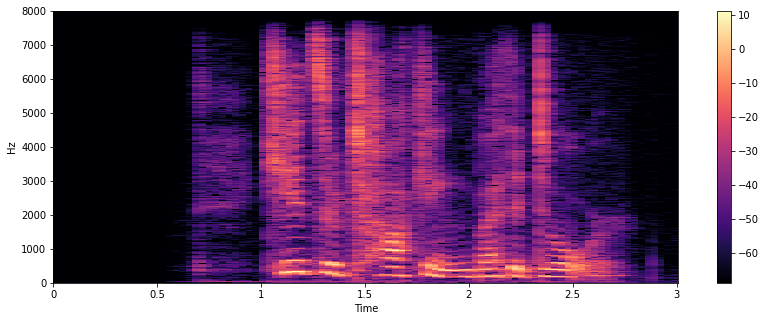

In [ ]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_final_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=sr,n_fft=2048,hop_length=512, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

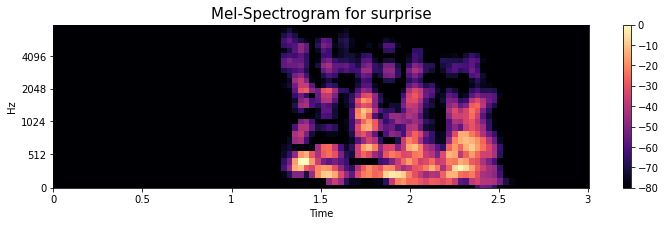

In [ ]:
emotion='surprise'
path = np.array(Ravdess_final_df.Path[Ravdess_final_df.Emotions==emotion])[150]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

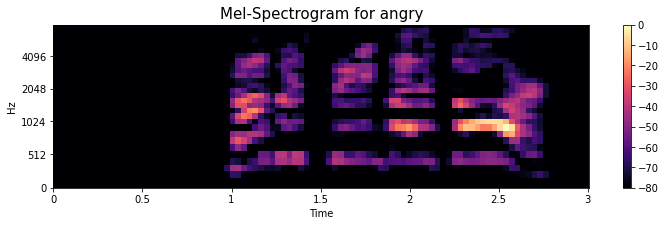

In [ ]:
emotion='angry'
path = np.array(Ravdess_final_df.Path[Ravdess_final_df.Emotions==emotion])[50]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

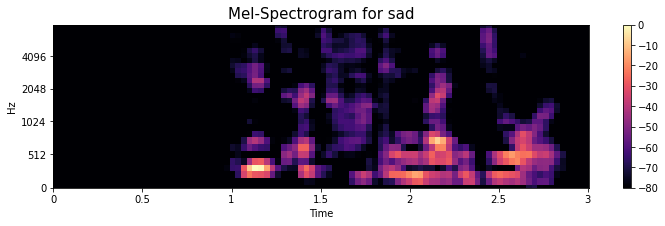

In [ ]:
emotion='sad'
path = np.array(Ravdess_final_df.Path[Ravdess_final_df.Emotions==emotion])[6]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

In [ ]:
def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time',sr=sr)
    plt.ylabel('MFCC')
    plt.colorbar(format='%+02.0f dB')

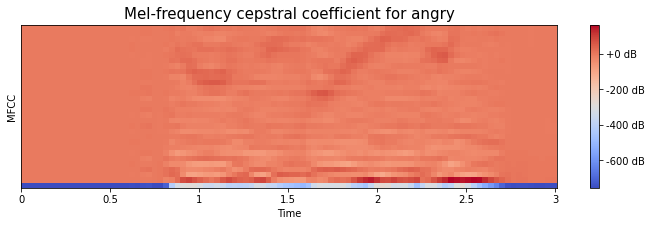

In [ ]:
emotion='angry'
path = np.array(Ravdess_final_df.Path[Ravdess_final_df.Emotions==emotion])[150]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(Ravdess_final_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5756,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5757,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(mel_mfcc
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True

                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(4608, 60, 94, 1) (231, 60, 94, 1) (921, 60, 94, 1) (4608, 8) (231, 8) (921, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(4608, 60, 94, 1) (231, 60, 94, 1) (921, 60, 94, 1) (4608, 8) (231, 8) (921, 8)


In [ ]:
y_train.nunique()

Emotions_angry       2
Emotions_calm        2
Emotions_disgust     2
Emotions_fear        2
Emotions_happy       2
Emotions_neutral     2
Emotions_sad         2
Emotions_surprise    2
dtype: int64

In [ ]:
y_train.Emotions_angry.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_happy.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_neutral.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_sad.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_surprise.unique()

array([0., 1.])

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
class AttentionGate(Layer):

    def __init__(self, filters, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.normal = Conv2D(filters, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', activation='relu')
        self.add = Add()
        self.resample = UpSampling2D()
        self.learn = Conv2D(1,kernel_size=1, padding='same', activation='sigmoid')
        self.adapt = Multiply()

    def call(self, X):
        X, skip_X = X
        x = self.normal(X)
        skip = self.down(skip_X)
        x = self.add([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = self.adapt([x,skip_X])
        return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'filters':self.filters,
            }



In [ ]:
def dilated_attention_unet():
    x_input = Input(shape =(60,94, 1))
    print(x_input)

    conv_1 = Conv2D(32, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(x_input)
    print('CONV1',conv_1.shape)
    drop_1 = Dropout(0.5)(conv_1)
    print('drop1',drop_1.shape)
    pool_1 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_1)
    print('pool_1',pool_1.shape)

    conv_2 = Conv2D(64, 3,padding='same',dilation_rate=4,  activation = LeakyReLU(alpha=0.1))(pool_1)
    print('CONV2',conv_2.shape)
    conv_2_final= tf.pad(conv_2,((0,0), (0,0), (0,1), (0,0)))
    print('CONV2_final',conv_2_final.shape)

    pool_2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_2_final)
    print('pool_2',pool_2.shape)

    conv_3 = Conv2D(128, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_2)
    print('CONV3',conv_3.shape)
    conv_3_final= tf.pad(conv_3,((0,0), (0,1), (0,0), (0,0)))
    print('CONV3_final',conv_3_final.shape)

    pool_3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_3_final)
    print('pool_3',pool_3.shape)

    conv_4 = Conv2D(256, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_3)
    print('CONV4',conv_4.shape)
    pool_4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_4)
    print('pool_4',pool_4.shape)

    conv_5 = Conv2D(512, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_4)
    print('CONV5',conv_5.shape)
    drop_5 = Dropout(0.5)(conv_5)
    print('drop5',drop_5.shape)
    pool_5 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_5)
    print('pool_5',pool_5.shape)


    conv_6 = Conv2D(1024, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_5)
    print('CONV6',conv_6.shape)
    drop_6 = Dropout(0.5)(conv_6)
    print('drop6',drop_6.shape)

    a1 = AttentionGate(512, name="Attention1")([drop_6, drop_5])
    print('A1',a1.shape)
    up7a =Conv2DTranspose(filters=512,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(drop_6)
    print('De-Conv1',up7a.shape)
    up7b = Concatenate(axis=3)([up7a, a1])
    print('concatenate_up7b',up7b.shape)
    conv_8 = Conv2D(filters=512,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up7b)
    print('conv8',conv_8.shape)

    a2 = AttentionGate(256, name="Attention2")([conv_8, conv_4])
    print('A2',a2.shape)
    up9a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_8)
    print('De-Conv2',up9a.shape)
    up9b = Concatenate(axis=3)([a2, up9a])
    print('concatenate_up9b',up9b.shape)
    conv_10 = Conv2D(filters=256,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up9b)
    print('conv10',conv_10.shape)

    a3 = AttentionGate(128, name="Attention3")([conv_10, conv_3_final])
    print('A3',a3.shape)
    up11a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_10)
    print('De-Conv3',up11a.shape)
    up11b = Concatenate(axis=3)([a3, up11a])
    print('concatenate_up11b',up11b.shape)
    conv_12 = Conv2D(filters=128,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up11b)
    print('conv12',conv_12.shape)
    conv_12_crop=tf.keras.layers.Cropping2D(cropping=((1,0), (0,0)))(conv_12)
    print('conv_12_crop',conv_12_crop.shape)

    a4 = AttentionGate(64, name="Attention4")([conv_12_crop, conv_2_final])
    print('A4',a4.shape)
    up13a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_12_crop)
    print('De-Conv4',up13a.shape)
    up13b = Concatenate(axis=3)([a4, up13a])
    print('concatenate_up13b',up13b.shape)
    conv_14 = Conv2D(filters=64,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up13b)
    print('conv14',conv_14.shape)
    conv_14_crop = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(conv_14)
    print('conv14_crop',conv_14_crop.shape)

    a5 = AttentionGate(32, name="Attention5")([conv_14_crop, drop_1])
    print('A5',a5.shape)
    up15a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_14_crop)
    print('De-Conv5',up15a.shape)
    up15b = Concatenate(axis=3)([a5, up15a])
    print('concatenate_up15b',up15b.shape)
    conv_16 = Conv2D(filters=32,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up15b)
    print('conv16',conv_16.shape)

    flat_1 = Flatten()(conv_16)
    den_1= Dense(5, activation='softmax')(flat_1)
    print(den_1.shape)



    model = Model(inputs=x_input, outputs=den_1)
    return model

In [ ]:
model=dilated_attention_unet()
print(model)
# model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 60, 94, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
CONV1 (None, 60, 94, 32)
drop1 (None, 60, 94, 32)
pool_1 (None, 30, 47, 32)
CONV2 (None, 30, 47, 64)
CONV2_final (None, 30, 48, 64)
pool_2 (None, 15, 24, 64)
CONV3 (None, 15, 24, 128)
CONV3_final (None, 16, 24, 128)
pool_3 (None, 8, 12, 128)
CONV4 (None, 8, 12, 256)
pool_4 (None, 4, 6, 256)
CONV5 (None, 4, 6, 512)
drop5 (None, 4, 6, 512)
pool_5 (None, 2, 3, 512)
CONV6 (None, 2, 3, 1024)
drop6 (None, 2, 3, 1024)
A1 (None, 4, 6, 512)
De-Conv1 (None, 4, 6, 512)
concatenate_up7b (None, 4, 6, 1024)
conv8 (None, 4, 6, 512)
A2 (None, 8, 12, 256)
De-Conv2 (None, 8, 12, 256)
concatenate_up9b (None, 8, 12, 512)
conv10 (None, 8, 12, 256)
A3 (None, 16, 24, 128)
De-Conv3 (None, 16, 24, 128)
concatenate_up11b (None, 16, 24, 256)
conv12 (None, 16, 24, 128)
conv_12_crop (None, 15, 24, 128)
A4 (None, 30, 48, 64)
De-Conv4 (None, 30, 48, 64)
concatenate_up

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 94, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 60, 94, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 60, 94, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 47, 32)   0           ['dropout[0][0]']                
                                                                                              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'kullback_leibler_divergence' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 1.7947 - accuracy: 0.3186
Epoch 1: val_accuracy improved from -inf to 0.43648, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
72/72 [==============================] - 16s 186ms/step - loss: 1.7947 - accuracy: 0.3186 - val_loss: 1.4821 - val_accuracy: 0.4365
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 1.0231 - accuracy: 0.6450
Epoch 2: val_accuracy improved from 0.43648 to 0.66450, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
72/72 [==============================] - 12s 165ms/step - loss: 1.0231 - accuracy: 0.6450 - val_loss: 0.9365 - val_accuracy: 0.6645
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.4068 - accuracy: 0.8730
Epoch 3: val_accuracy improved from 0.66450 to 0.74267, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
72/72 [========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 34ms/step - loss: 1.4906 - accuracy: 0.7965
Accuracy of our model on test data :  79.65368032455444 %


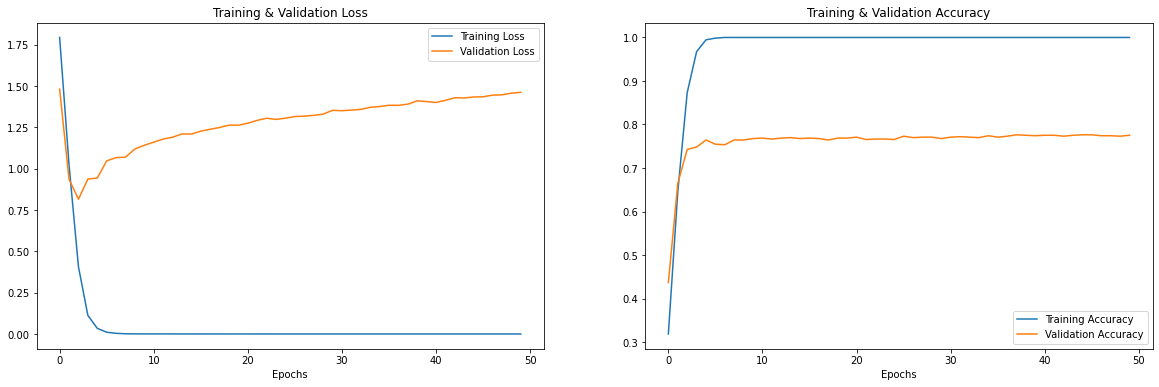

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

8/8 [==============================] - 1s 35ms/step


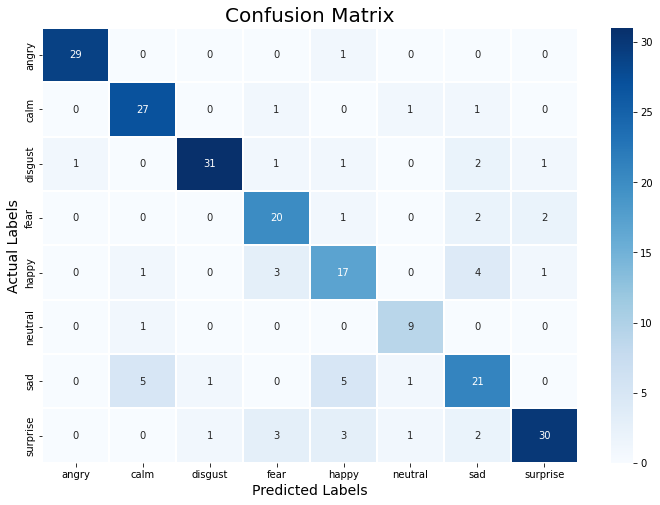

              precision    recall  f1-score   support

       angry       0.97      0.97      0.97        30
        calm       0.79      0.90      0.84        30
     disgust       0.94      0.84      0.89        37
        fear       0.71      0.80      0.75        25
       happy       0.61      0.65      0.63        26
     neutral       0.75      0.90      0.82        10
         sad       0.66      0.64      0.65        33
    surprise       0.88      0.75      0.81        40

    accuracy                           0.80       231
   macro avg       0.79      0.81      0.79       231
weighted avg       0.80      0.80      0.80       231



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))

**categorical loss function**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 1.7421 - accuracy: 0.3218
Epoch 1: val_accuracy improved from -inf to 0.45277, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
72/72 [==============================] - 15s 187ms/step - loss: 1.7421 - accuracy: 0.3218 - val_loss: 1.4355 - val_accuracy: 0.4528
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 1.0618 - accuracy: 0.6198
Epoch 2: val_accuracy improved from 0.45277 to 0.64278, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
72/72 [==============================] - 12s 168ms/step - loss: 1.0618 - accuracy: 0.6198 - val_loss: 1.0268 - val_accuracy: 0.6428
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.8442
Epoch 3: val_accuracy improved from 0.64278 to 0.70141, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
72/72 [========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 37ms/step - loss: 1.7832 - accuracy: 0.7576
Accuracy of our model on test data :  75.75757503509521 %


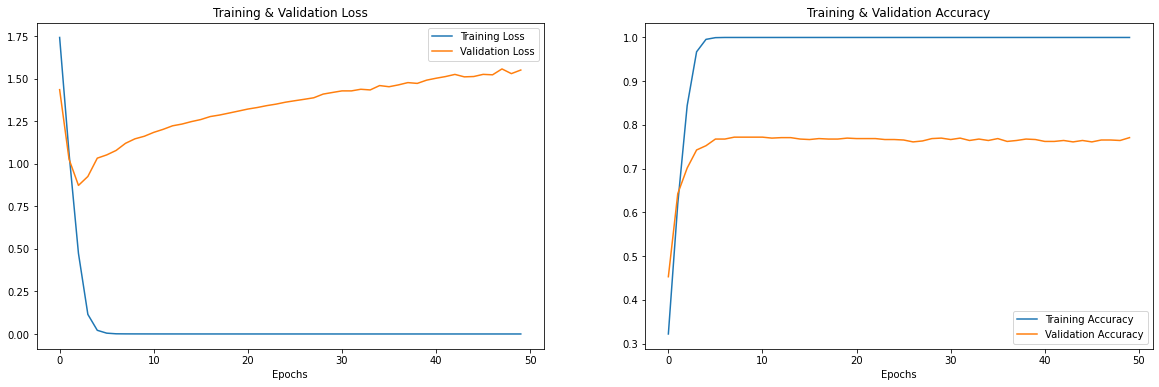

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

8/8 [==============================] - 1s 37ms/step


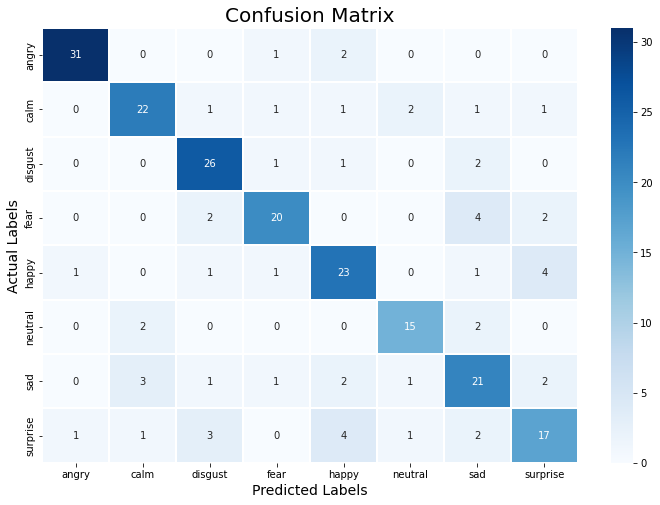

              precision    recall  f1-score   support

       angry       0.94      0.91      0.93        34
        calm       0.79      0.76      0.77        29
     disgust       0.76      0.87      0.81        30
        fear       0.80      0.71      0.75        28
       happy       0.70      0.74      0.72        31
     neutral       0.79      0.79      0.79        19
         sad       0.64      0.68      0.66        31
    surprise       0.65      0.59      0.62        29

    accuracy                           0.76       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.76      0.76      0.76       231



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))